In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Introduce data

In [2]:
df1 = pd.read_csv('raw/train.csv')
df2 = pd.read_csv('raw/test.csv')
df1.shape, df2.shape  # test data does not contain 'SalePrice', the one we should predict

((1460, 81), (1459, 80))

In [3]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [4]:
df.shape

(2919, 81)

## Data cleaning

### A. Handle missing data

In [5]:
df.isnull().sum().sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
                ... 
Id                 0
HouseStyle         0
HeatingQC          0
YearRemodAdd       0
1stFlrSF           0
Length: 81, dtype: int64

#### Delete the features that contain more than 80% of missing value

In [6]:
delete_list=[]
for col_name in df.columns:
    if df[col_name].isnull().sum()>0.8*df.shape[0] and col_name!='SalePrice':
        delete_list.append(col_name)
delete_list

['Alley', 'Fence', 'MiscFeature', 'PoolQC']

In [7]:
df = df.drop(delete_list,axis=1)
df.shape

(2919, 77)

#### Impute numerical missing data by median

In [8]:
impute_list_num = []
for col_name in df.columns:
    if df[col_name].isnull().sum()>0 and col_name!='SalePrice' and df[col_name].dtype!=object:
        impute_list_num.append(col_name)
impute_list_num

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF']

In [9]:
df[impute_list_num].isnull().sum().sort_values(ascending=False)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
TotalBsmtSF       1
GarageCars        1
GarageArea        1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64

In [10]:
for col_name in impute_list_num:
    df[col_name]=df[col_name].fillna(df[col_name].median())

In [11]:
df[impute_list_num].isnull().sum().sort_values(ascending=False)

TotalBsmtSF     0
MasVnrArea      0
LotFrontage     0
GarageYrBlt     0
GarageCars      0
GarageArea      0
BsmtUnfSF       0
BsmtHalfBath    0
BsmtFullBath    0
BsmtFinSF2      0
BsmtFinSF1      0
dtype: int64

#### Impute categorical missing data

In [12]:
cat_list = []
for col_name in df.columns:
    if df[col_name].isnull().sum()>0 and col_name!='SalePrice' and df[col_name].dtype==object:
        cat_list.append(col_name)

In [13]:
df[cat_list].isnull().sum().sort_values(ascending=False)

FireplaceQu     1420
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Utilities          2
Functional         2
Electrical         1
Exterior1st        1
Exterior2nd        1
SaleType           1
KitchenQual        1
dtype: int64

In [14]:
do_not_exist = ['FireplaceQu','GarageQual','GarageFinish','GarageCond','GarageType',
                'BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1',
                'MasVnrType'
               ]
for col_name in do_not_exist:
    df[col_name].fillna(value='do_not_exist', inplace=True) 

In [15]:
df[cat_list].isnull().sum().sort_values(ascending=False)

MSZoning        4
Utilities       2
Functional      2
KitchenQual     1
SaleType        1
Exterior2nd     1
Exterior1st     1
Electrical      1
MasVnrType      0
GarageType      0
GarageQual      0
GarageFinish    0
GarageCond      0
FireplaceQu     0
BsmtQual        0
BsmtFinType2    0
BsmtFinType1    0
BsmtExposure    0
BsmtCond        0
dtype: int64

In [16]:
impute_list_cat = ['MSZoning','Utilities','Functional','KitchenQual','SaleType',
                   'Exterior2nd','Exterior1st','Electrical']

In [17]:
# df['Utilities'].value_counts(dropna=False).sort_values(ascending=False).index[0]

In [18]:
for col_name in impute_list_cat:
    most_freq = df[col_name].value_counts(dropna=False).sort_values(ascending=False).index[0]
    df[col_name].fillna(value=most_freq, inplace=True)

In [19]:
df[cat_list].isnull().sum().sort_values(ascending=False)

Utilities       0
FireplaceQu     0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
BsmtQual        0
Electrical      0
Exterior1st     0
Exterior2nd     0
Functional      0
SaleType        0
GarageCond      0
GarageFinish    0
GarageQual      0
GarageType      0
KitchenQual     0
MSZoning        0
MasVnrType      0
BsmtCond        0
dtype: int64

### B. Deal with data types

In [20]:
for col_name in df.columns:
    if col_name!='SalePrice' and df[col_name].dtype==object:
        unique_categories = len(df[col_name].unique())
        print("Feature '{col_name}' has '{unique_categories}' unique categories".format(col_name=col_name, unique_categories=unique_categories))

Feature 'BldgType' has '5' unique categories
Feature 'BsmtCond' has '5' unique categories
Feature 'BsmtExposure' has '5' unique categories
Feature 'BsmtFinType1' has '7' unique categories
Feature 'BsmtFinType2' has '7' unique categories
Feature 'BsmtQual' has '5' unique categories
Feature 'CentralAir' has '2' unique categories
Feature 'Condition1' has '9' unique categories
Feature 'Condition2' has '8' unique categories
Feature 'Electrical' has '5' unique categories
Feature 'ExterCond' has '5' unique categories
Feature 'ExterQual' has '4' unique categories
Feature 'Exterior1st' has '15' unique categories
Feature 'Exterior2nd' has '16' unique categories
Feature 'FireplaceQu' has '6' unique categories
Feature 'Foundation' has '6' unique categories
Feature 'Functional' has '7' unique categories
Feature 'GarageCond' has '6' unique categories
Feature 'GarageFinish' has '4' unique categories
Feature 'GarageQual' has '6' unique categories
Feature 'GarageType' has '7' unique categories
Feature 

In [21]:
to_dummy_list = []
for col_name in df.columns:
    if df[col_name].dtype==object:
        to_dummy_list.append(col_name)

In [22]:
# Function to dummy for all categorical features
def dummy_df(df, to_dummy_list):
    for x in to_dummy_list:
        dummies = pd.get_dummies(df[x],prefix=x,dummy_na=False)
        df=df.drop(x,1)
        df=pd.concat([df,dummies],axis=1)
    return df

In [23]:
df = dummy_df(df,to_dummy_list)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,1,0,1,1,0


### C. Detect outliers

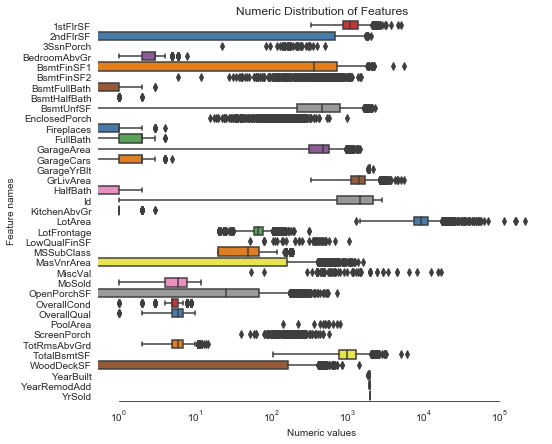

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 丢弃y值
all_features = df.drop(['SalePrice'], axis=1)

# 找出所有的数值型变量
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)
        
# 对所有的数值型变量绘制箱体图
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=all_features[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [25]:
def find_outliers_tukey(feature):
    q1 = np.percentile(feature, 25)
    q3 = np.percentile(feature, 75)
    iqr = q3-q1
    upbound = q3+1.5*iqr
    downbound = q1 - 1.5*iqr
    outlier_indices = list(feature.index[(feature>upbound)|(feature<downbound)])
    outlier_values = list(feature[outlier_indices])
    return outlier_indices,outlier_values

In [26]:
tukey_indices,tukey_values = find_outliers_tukey(df['EnclosedPorch'])
df.iloc[tukey_indices,:]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,1,0,1,1,0
7,1107,983,0,3,859.0,32.0,1.0,0.0,216.0,228,...,0,0,0,0,0,1,0,1,1,0
8,1022,752,0,2,0.0,0.0,0.0,0.0,952.0,205,...,0,0,0,0,0,1,0,1,1,0
14,1253,0,0,2,733.0,0.0,1.0,0.0,520.0,176,...,0,0,0,0,0,1,0,1,1,0
21,1108,0,0,3,0.0,0.0,0.0,0.0,637.0,205,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,861,424,0,3,374.0,0.0,0.0,1.0,487.0,132,...,0,0,0,0,0,1,0,1,1,0
2888,672,0,0,2,0.0,0.0,0.0,0.0,432.0,112,...,0,0,0,0,0,1,0,1,1,0
2889,641,0,0,2,0.0,0.0,0.0,0.0,641.0,70,...,0,0,0,0,0,1,0,1,1,0
2891,729,0,0,2,0.0,0.0,0.0,0.0,0.0,23,...,0,0,0,0,0,1,0,1,1,0


## Save data

In [27]:
test = df[df['SalePrice'].isna()]
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1460,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,0,1,0,1,1,0
1461,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,0,1,0,1,1,0
1462,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,0,1,0,1,1,0
1463,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,0,1,0,1,1,0
1464,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,0,1,0,1,1,0


In [28]:
test.shape

(1459, 288)

In [29]:
train = df[df['SalePrice'].notna()]
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,1,0,1,1,0


In [30]:
train.shape

(1460, 288)

In [32]:
train.to_csv('cleaned/train_cleaned.csv', index=True)
test.to_csv('cleaned/test_cleaned.csv', index=True)